In [75]:
#importing important modules
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import requests as rq
import json

%matplotlib inline 


In [76]:
#loading environment
load_dotenv('keys.env')

True

In [77]:
#loading api keys
alpaca_key = os.getenv('alpaca_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')

# Part 1 - Personal Finance Planner

In [78]:
# amount of crypto assets
my_btc= 1.2
my_eth= 5.3

In [79]:
#Crypto API URLs + format to json
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD" + "?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD" + "?format=json"

In [80]:
#Response from website
btc_response_data=rq.get(btc_url)
eth_response_data=rq.get(eth_url)

In [81]:
#extracting content from website
btc_content=btc_response_data.content
eth_content=eth_response_data.content

In [82]:
#formatting to json 
btc_data=btc_response_data.json()
eth_data=eth_response_data.json()

In [83]:
#clean up data to be able to visualize and slice index
print(json.dumps(eth_data, indent=3))

{
   "data": {
      "1027": {
         "id": 1027,
         "name": "Ethereum",
         "symbol": "ETH",
         "website_slug": "ethereum",
         "rank": 2,
         "circulating_supply": 115320245,
         "total_supply": 115320245,
         "max_supply": 0,
         "quotes": {
            "USD": {
               "price": 2083.56,
               "volume_24h": 33958773877,
               "market_cap": 239254391765,
               "percentage_change_1h": 2.42284899194191,
               "percentage_change_24h": 1.88559878492079,
               "percentage_change_7d": 22.5359951879032,
               "percent_change_1h": 2.42284899194191,
               "percent_change_24h": 1.88559878492079,
               "percent_change_7d": 22.5359951879032
            }
         },
         "last_updated": 1617477526
      }
   },
   "metadata": {
      "timestamp": 1617477526,
      "num_cryptocurrencies": 1319,
      "error": null
   }
}


In [84]:
#fetching crypto prices
btc_price=btc_data['data']['1']['quotes']['USD']['price']
eth_price=eth_data['data']['1027']['quotes']['USD']['price']



In [85]:
#Calculating Value of Crypto
value_my_btc = round(my_btc * btc_price,2)
value_my_eth = round(my_eth * eth_price,2)
total_value_crypto= value_my_btc+value_my_eth

print (f'The current value of your {my_btc} BTC is ${value_my_btc} and the current value of your {my_eth} ETH is ${value_my_eth}')

The current value of your 1.2 BTC is $70390.8 and the current value of your 5.3 ETH is $11042.87


## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)


In [86]:
#current amount of shares
my_spy = 50
my_agg = 200

In [87]:
#creating alpaca API object
alpaca_api_key = os.getenv('alpaca_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [88]:
#setting time frame
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
begin_date=pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-02", tz="America/New_York").isoformat()

#creating tickers
tickers = ['SPY', 'AGG']

#extracting info of tickers
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=begin_date,
    end=end_date,
).df #this creates into a dataframe, so that we can preview data

df_ticker.tail()

AGG                                        SPY  \
                             open     high      low   close   volume    open   
time                                                                           
2021-03-26 00:00:00-04:00  113.91  114.075  113.860  113.93  3385851  390.93   
2021-03-29 00:00:00-04:00  113.52  114.000  113.520  113.72  5524113  394.40   
2021-03-30 00:00:00-04:00  113.64  113.850  113.525  113.82  4742520  394.42   
2021-03-31 00:00:00-04:00  113.84  113.980  113.710  113.82  5851348  395.34   
2021-04-01 00:00:00-04:00  113.93  114.050  113.830  114.02  9491631  398.40   

                                                              
                             high     low    close    volume  
time                                                          
2021-03-26 00:00:00-04:00  396.41  390.29  395.970  91121640  
2021-03-29 00:00:00-04:00  396.75  392.81  395.485  86133590  
2021-03-30 00:00:00-04:00  395.45  393.02  394.780  63446300  
2021-03-31 00:00:00-04:00  398.00  395.31  396.260  88555440  
2021-04-01 00:00:00-04:00  400.67  398.18  400.530  72714084

In [89]:
#creating new dataframe that only shows "close"
df_closing_prices = pd.DataFrame()
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

df_closing_prices.index = df_closing_prices.index.date #changes index from time stamp to just date
df_closing_prices.tail()

,SPY,AGG
2021-03-26,395.970,113.93
2021-03-29,395.485,113.72
2021-03-30,394.780,113.82
2021-03-31,396.260,113.82
2021-04-01,400.530,114.02


In [90]:
#determing the last closing prices and value of my stocks
spy_closing_price=df_closing_prices['SPY'][-1]
agg_closing_prince=df_closing_prices['AGG'][-1]
my_spy_value=my_spy * spy_closing_price
my_agg_value=my_agg *agg_closing_prince
total_value_shares=my_agg_value+my_spy_value

In [91]:
print(f'The current SPY closing price is ${spy_closing_price}')
print(f'the current AGG closing price is ${agg_closing_prince}')

The current SPY closing price is $400.53
the current AGG closing price is $114.02


In [92]:
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $20026.5
The current value of your 200 AGG shares is $22804.0


## Savings Health Analysis

In [93]:
#creating variable to set monthly household income
monthly_income= 12000

#creating savings DataFrame
df_savings=pd.DataFrame({'Amount' : [total_value_crypto,
                                     total_value_shares]
                        }, index=['Crypto', 'Shares'])

#adding value to Dataframe
#df_savings['Amount'][0] = total_value_crypto
#df_savings['Amount'][1] = total_value_shares
df_savings.head()
    


,Amount
Crypto,81433.67
Shares,42830.50


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

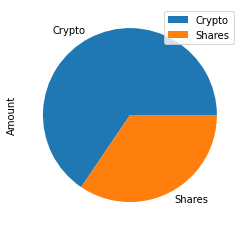

In [94]:
#plotting pie chart
df_savings.plot.pie(subplots=True)

In [95]:
#setting ideal emergency fund and total savings
emergency_fund= monthly_income*3
total_savings= total_value_crypto+total_value_shares


In [96]:
if total_savings > emergency_fund:
    print('Congratulations! Your account has more than enough funds!')
elif total_savings == emergency_fund:
    print('Congratulations on reaching your financial goal!')
else:
    print(f'Your account is below your goal')

Congratulations! Your account has more than enough funds!


## Part 2 - Retirement Planning

In [97]:
#setting time frame
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
begin_date_2=pd.Timestamp("2016-04-02", tz="America/New_York").isoformat()
#end_date = pd.Timestamp("2021-04-02", tz="America/New_York").isoformat()

#extracting info of tickers
five_year_data = api.get_barset(
    tickers,
    timeframe,
    start=begin_date_2,
    end=end_date,
).df #this creates into a dataframe, so that we can preview data

five_year_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2020-11-06 00:00:00-05:00  117.81  117.86  117.6699  117.80  5106146  349.93   
2020-11-09 00:00:00-05:00  117.40  117.47  117.0600  117.24  6073474  363.97   
2020-11-10 00:00:00-05:00  117.05  117.23  117.0300  117.05  4663301  353.49   
2020-11-11 00:00:00-05:00  117.06  117.18  117.0200  117.15  3001773  356.40   
2020-11-12 00:00:00-05:00  117.37  117.63  117.3300  117.62  7438935  355.58   

                                                                
                               high     low   close     volume  
time                                                            
2020-11-06 00:00:00-05:00  351.5100  347.65  350.19   58137413  
2020-11-09 00:00:00-05:00  364.3800  354.06  354.54  140613847  
2020-11-10 00:00:00-05:00  355.1800  350.51  354.07   69143380  
2020-11-11 00:00:00-05:00  357.5600  355.06  356.62   45627772  
2020-11-12 00:00:00-05:00  356.7182  351.26  353.28   57393573

In [98]:
#MonteCarlo simulation for next 30 years, with 500 simulations
mc_thirty_years=MCSimulation(
    portfolio_data = five_year_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days =252*30)


In [99]:
mc_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003269,1.008457,1.001578,0.999215,1.004217,1.005952,1.004670,0.992584,0.997814,0.999453,...,1.003215,1.001107,1.006327,0.989002,0.994883,0.999184,0.996193,1.001025,1.005706,0.993329
2,1.003345,1.012402,0.998258,0.999302,0.998909,1.001835,1.015557,0.997150,0.989776,0.999516,...,1.005742,0.991391,1.004335,0.985585,0.997705,0.997988,0.994503,1.008430,1.005500,0.998869
3,1.006557,1.012299,0.999956,0.999236,1.002019,1.002749,1.023537,0.993229,0.991271,1.002024,...,1.007148,0.999104,1.001778,0.979718,0.997490,1.001832,0.992470,1.021378,0.999245,0.995889
4,1.007081,1.016193,1.005201,1.006846,1.007460,1.001207,1.030875,0.987402,0.991147,1.004014,...,1.011100,1.001717,1.001614,0.977811,0.994166,1.000613,0.989671,1.026803,1.002724,0.981316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,328.610373,139.795643,130.593715,227.561084,133.221399,407.528139,209.151090,148.738243,104.681081,259.226309,...,414.254385,231.821184,202.353883,186.982030,88.900662,124.726339,195.759730,310.120471,389.954369,243.366059
7557,326.712419,139.062514,132.231748,227.583206,133.239686,406.822174,208.960391,148.505821,104.734752,258.788877,...,413.627963,231.297987,201.179996,188.729741,90.008555,125.385915,196.485625,311.790603,390.132214,242.233115
7558,326.299748,139.775754,132.474190,229.896659,133.142522,408.437946,207.902034,147.739237,104.500967,257.551563,...,410.221802,231.219216,201.125759,187.978783,89.909290,124.307720,197.716606,312.191252,389.298205,242.498421
7559,326.500339,139.146586,132.443988,230.385518,132.300712,409.313773,207.024802,147.428808,104.491480,260.470679,...,412.052252,232.004291,201.733499,187.259861,90.319438,123.584085,198.450053,314.058898,390.587625,242.252904


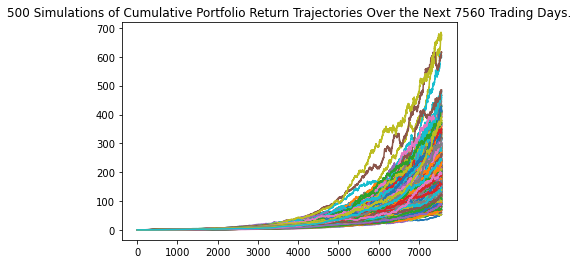

In [100]:
# plotting simulation
line_plot =mc_thirty_years.plot_simulation()

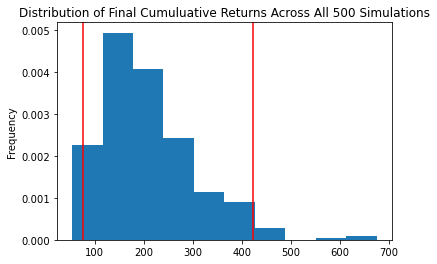

In [101]:
#plotting distribution
distribution_plot=mc_thirty_years.plot_distribution()

In [102]:
#summary statistic
summary_statistic=mc_thirty_years.summarize_cumulative_return()
summary_statistic

count           500.000000
mean            209.968964
std              97.071252
min              54.287941
25%             141.875157
50%             189.454920
75%             262.664871
max             674.292114
95% CI Lower     75.523955
95% CI Upper    422.956790
Name: 7560, dtype: float64

In [103]:
#defining initial inv. as well as upper and lower 95% returns
initial_investment=20000
ci_lower = round(summary_statistic[8]*initial_investment,2)
ci_upper = round(summary_statistic[9]*initial_investment,2)

In [104]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} "
      f"will return between ${ci_lower} and ${ci_upper} within 30 years")

There is a 95% chance that an initial investment of $20000 will return between $1510479.1 and $8459135.81 within 30 years
